In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b9228746-3b10-7c03-0192-1720fb20465d)


#Downloading the data

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct/

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [4]:
!ls pubmed-rct/PubMed_20k_RCT

dev.txt  test.txt  train.txt


In [5]:
DATA_DIR = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [6]:
import os

In [7]:
filenames = [DATA_DIR + filename for filename in os.listdir(DATA_DIR)]

In [8]:
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

# Preprocessing the Data

## Reading in single lines of data and returning them as a list

In [9]:
def get_lines(directory):
  with open(directory,'r') as f:
    return f.readlines()

In [10]:
train_lines = get_lines(DATA_DIR + 'train.txt')

In [11]:
print(train_lines[:20])

['###24293578\n', 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n', 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n', 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n', 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n', 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n', 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-s

In [12]:
def preprocess_and_get_line_with_number(filepath):
  filelines = get_lines(filepath)
  abstractlines = ""
  preprocessed_list = []
  for fileline in filelines:
    # print(fileline)
    if fileline.startswith('###'):
      abstractid = fileline
      # print(abstractid)
      abstractlines = ""

    elif fileline.isspace():
      abstract_line_split = abstractlines.splitlines()
      for abstractline_num,abstractline in enumerate(abstract_line_split):
        abstractline_dict = {}
        abstractline_target = abstractline.split('\t')[0]
        abstractline_text = abstractline.split('\t')[1]
        abstractline_dict['Line Number'] = abstractline_num + 1
        abstractline_dict['Target'] = abstractline_target
        abstractline_dict['Text'] = abstractline_text
        abstractline_dict['Total Lines'] = len(abstract_line_split)
        # print(abstractline_dict)
        preprocessed_list.append(abstractline_dict)

    else:
      abstractlines = abstractlines + fileline
  return preprocessed_list

In [13]:
train_samples = preprocess_and_get_line_with_number(DATA_DIR + 'train.txt')
valid_samples = preprocess_and_get_line_with_number(DATA_DIR + 'dev.txt')
test_samples = preprocess_and_get_line_with_number(DATA_DIR + 'test.txt')

In [14]:
len(train_samples), len(valid_samples), len(test_samples)

(180040, 30212, 30135)

In [15]:
train_samples[:14]

[{'Line Number': 1,
  'Target': 'OBJECTIVE',
  'Text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'Total Lines': 12},
 {'Line Number': 2,
  'Target': 'METHODS',
  'Text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'Total Lines': 12},
 {'Line Number': 3,
  'Target': 'METHODS',
  'Text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'Total Lines': 12},
 {'Line Number': 4,
  'Target': 'METHODS',
  'Text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'Total Lines': 12},
 {'Line Number': 5,
  'Target': 'METHODS',
  'Text': 'Secondary outcome measures include

In [16]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
validation_df = pd.DataFrame(valid_samples)
test_df = pd.DataFrame(test_samples)

In [17]:
train_df.head(10)

,Line Number,Target,Text,Total Lines
0,1,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,2,METHODS,A total of @ patients with primary knee OA wer...,12
2,3,METHODS,Outcome measures included pain reduction and i...,12
3,4,METHODS,Pain was assessed using the visual analog pain...,12
4,5,METHODS,Secondary outcome measures included the Wester...,12
5,6,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",12
6,7,RESULTS,There was a clinically relevant reduction in t...,12
7,8,RESULTS,The mean difference between treatment arms ( @...,12
8,9,RESULTS,"Further , there was a clinically relevant redu...",12
9,10,RESULTS,These differences remained significant at @ we...,12


In [18]:
class_names = train_df['Target'].unique()

In [19]:
class_names

array(['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],
      dtype=object)

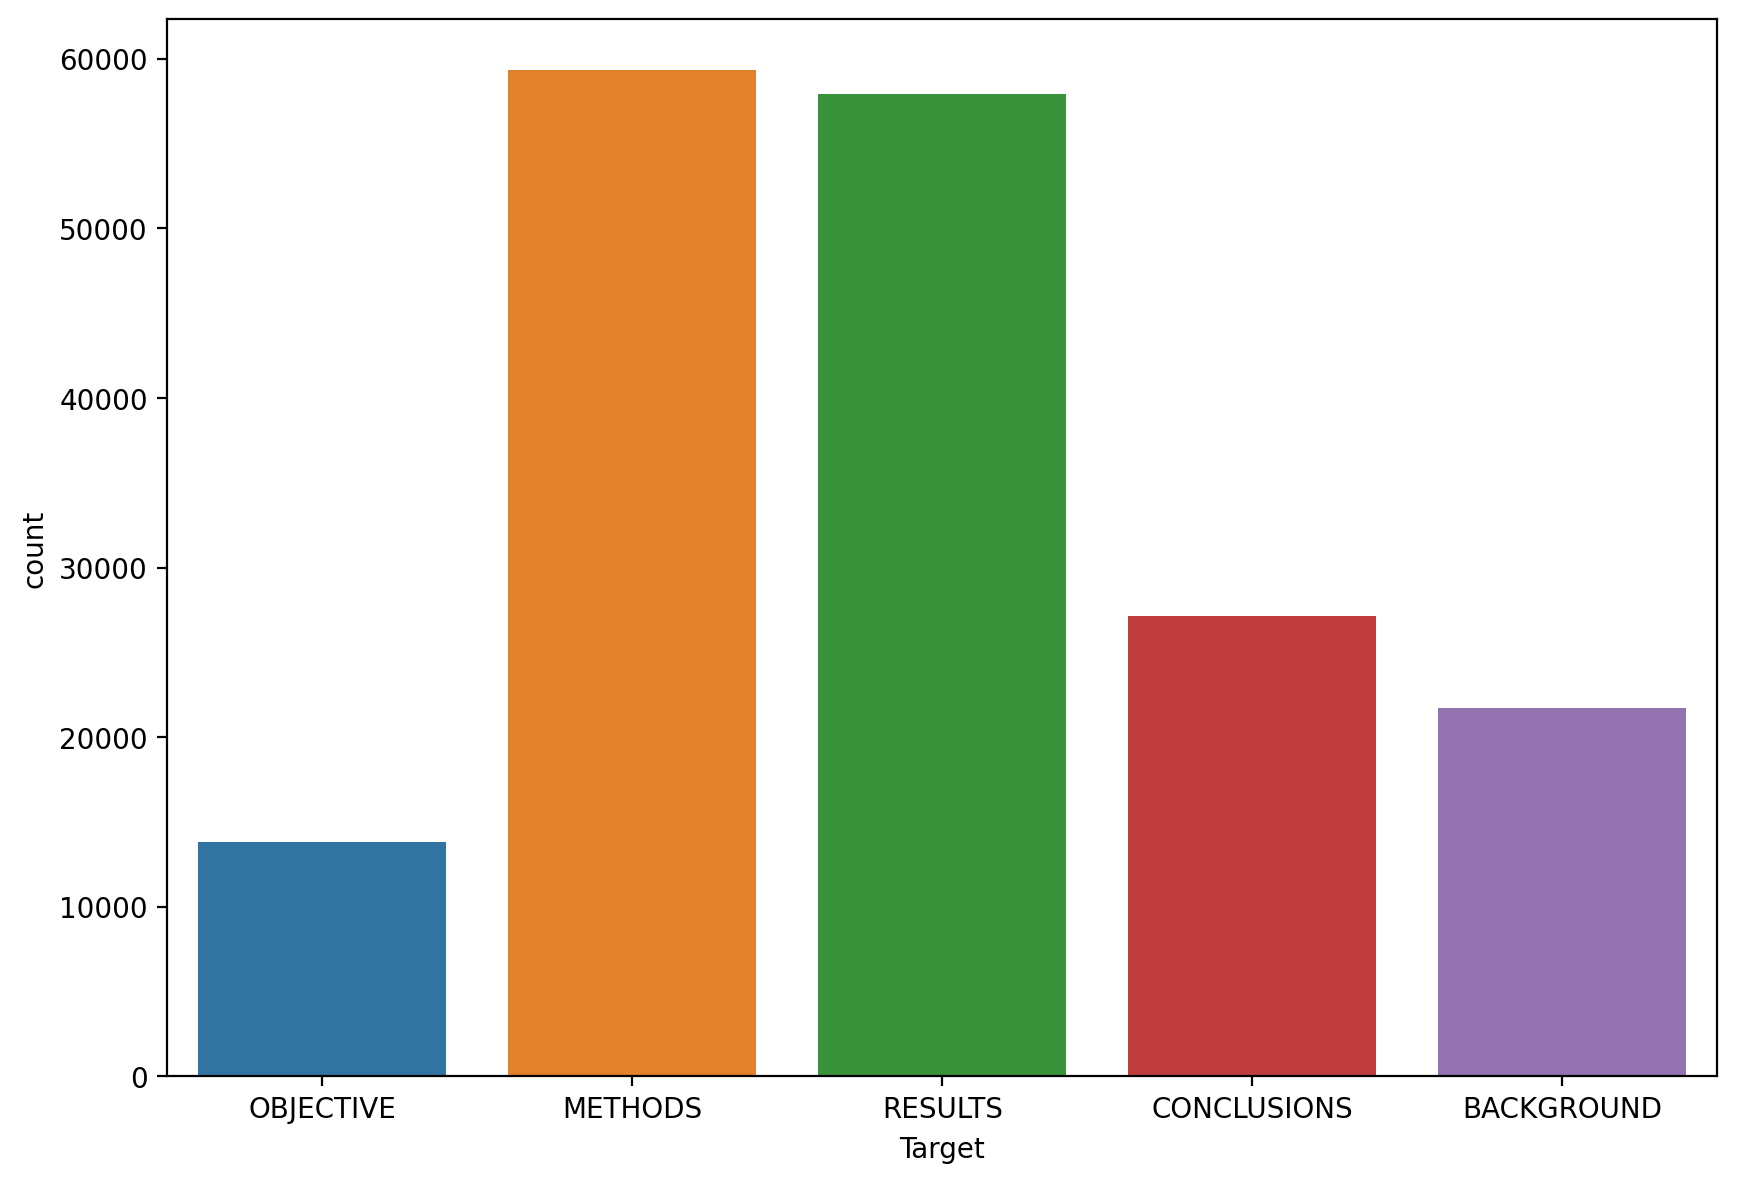

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7), dpi=200)
sns.countplot(x = train_df['Target'])

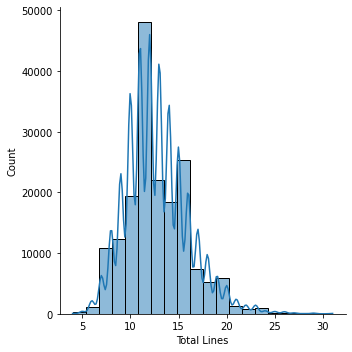

In [21]:
sns.displot(x=train_df['Total Lines'],bins=20, kde=True)

# Convert the text into lists

In [22]:
train_sentences = train_df['Text'].tolist()
val_sentences = validation_df['Text'].tolist()
test_sentences = test_df['Text'].tolist()

# Create Label and One Hot encoding of our labels

In [23]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False) # Here we give sparse as False since tensorflow doen't support sparse matrices and if we give sparse = True the output will be a sparse matrix
train_labels_one_hot = onehot.fit_transform(train_df['Target'].to_numpy().reshape(-1,1))
val_labels_one_hot = onehot.transform(validation_df['Target'].to_numpy().reshape(-1,1))
test_labels_one_hot = onehot.transform(test_df['Target'].to_numpy().reshape(-1,1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_labels_label_enc = labelencoder.fit_transform(train_df['Target'].to_numpy().reshape(-1,1))
val_labels_label_enc = labelencoder.transform(validation_df['Target'].to_numpy().reshape(-1,1))
test_labels_label_enc = labelencoder.transform(test_df['Target'].to_numpy().reshape(-1,1))

train_labels_label_enc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 2, 2, ..., 4, 1, 1])

In [25]:
labelencoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

# Perform a series of experiments

## model_0: naive bayes classifier with tfidf vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])
model_0.fit(X=train_sentences, y=train_labels_label_enc)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
model_0.score(val_sentences, val_labels_label_enc)

0.7218323844829869

In [28]:
model_0_preds = model_0.predict(val_sentences)

In [29]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-11-13 08:07:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-13 08:07:34 (66.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [30]:
from helper_functions import calculate_results, create_tensorboard_callback

In [31]:
model_0_results = calculate_results(val_labels_label_enc, model_0_preds)

In [32]:
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Tokenisation and Embedding for deep learning models

### Tokenisation

In [33]:
sent_length = [len(sentence.split()) for sentence in train_sentences]

In [34]:
sent_length

[49,
 27,
 15,
 14,
 35,
 29,
 30,
 55,
 36,
 8,
 32,
 39,
 12,
 26,
 33,
 40,
 22,
 23,
 27,
 26,
 27,
 34,
 41,
 18,
 9,
 23,
 59,
 16,
 18,
 22,
 17,
 51,
 8,
 17,
 16,
 5,
 21,
 4,
 42,
 50,
 11,
 19,
 20,
 29,
 36,
 44,
 39,
 25,
 19,
 24,
 19,
 14,
 11,
 18,
 16,
 26,
 16,
 18,
 38,
 28,
 21,
 18,
 22,
 9,
 37,
 6,
 32,
 21,
 26,
 25,
 18,
 21,
 20,
 12,
 26,
 16,
 23,
 19,
 16,
 39,
 19,
 14,
 37,
 34,
 15,
 47,
 26,
 87,
 17,
 29,
 31,
 13,
 37,
 28,
 35,
 60,
 64,
 66,
 8,
 12,
 17,
 40,
 43,
 37,
 47,
 6,
 40,
 64,
 20,
 32,
 53,
 16,
 30,
 54,
 51,
 19,
 28,
 32,
 36,
 40,
 13,
 25,
 30,
 23,
 17,
 15,
 20,
 50,
 12,
 16,
 27,
 24,
 10,
 24,
 5,
 14,
 19,
 32,
 13,
 21,
 23,
 10,
 11,
 17,
 12,
 21,
 21,
 15,
 17,
 21,
 18,
 40,
 33,
 21,
 41,
 21,
 13,
 29,
 28,
 13,
 44,
 20,
 31,
 8,
 29,
 13,
 116,
 27,
 26,
 32,
 34,
 17,
 23,
 20,
 29,
 11,
 7,
 17,
 31,
 43,
 36,
 17,
 31,
 17,
 42,
 18,
 39,
 29,
 30,
 24,
 81,
 19,
 19,
 33,
 22,
 11,
 55,
 11,
 14,
 28,
 42,
 34,
 

In [35]:
import numpy as np

In [36]:
np.mean(sent_length)

26.338269273494777

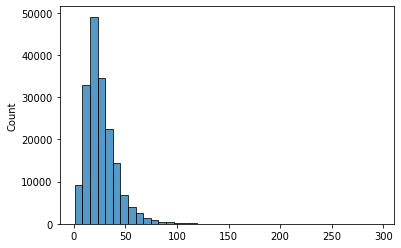

In [37]:
sns.histplot(sent_length, bins=40)

In [38]:
np.quantile(sent_length, 0.95)

55.0

In [39]:
output_seq_length = int(np.quantile(sent_length, 0.95))

In [40]:
min(sent_length)

1

In [41]:
max(sent_length)

296

In [42]:
np.argmin(sent_length)

4921

In [43]:
train_sentences[4921]

'I.'

In [44]:
vocab = 68000

## model_1: conv_1d with custom embeddings

In [45]:
import tensorflow as tf

In [46]:
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=vocab,
                                                 output_sequence_length=output_seq_length)

In [47]:
text_vectorizer.adapt(train_sentences)

In [48]:
import random
random_sent = random.choice(train_sentences)
print(f"Original text:\n{random_sent}\n")
print(f"Length of original text:\n{len(random_sent.split())}")
print(f"Tokenised form of the above text:{text_vectorizer([random_sent])}")

Original text:
The same doctor obtained the saphenous vein of each patient by a uniform method .

Length of original text:
15
Tokenised form of the above text:[[   2  431 5759  527    2 5175 1701    4  122  127   22    8 9022  363
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [49]:
print(f"Number of words in the vocabulary of the text vectorizer:\n{len(text_vectorizer.get_vocabulary())}")
print(f"The most common words in the vocabulary are:\n{text_vectorizer.get_vocabulary()[:10]}")
print(f"The least common words in the vocabulary are:\n{text_vectorizer.get_vocabulary()[-10:]}")

Number of words in the vocabulary of the text vectorizer:
64841
The most common words in the vocabulary are:
['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
The least common words in the vocabulary are:
['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [50]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

###Embedding

In [51]:
embedding = tf.keras.layers.Embedding(input_dim=vocab,
                                      output_dim=128,
                                      mask_zero=True,
                                      )

In [52]:
print(f"Sentence before text vectorization:\n{random_sent}")
vectorized_rand_sent = text_vectorizer([random_sent])
print(f"Sentence after text vectorization (before embedding):\n{vectorized_rand_sent}")
print(f"Shape of text vectorized sentence (before embedding):\n{vectorized_rand_sent.shape}")
embedded_rand_sent = embedding(vectorized_rand_sent)
print(f"Sentence after embedding:\n{embedded_rand_sent}")
print(f"Shape of text ater embedding:\n{embedded_rand_sent.shape}")

Sentence before text vectorization:
The same doctor obtained the saphenous vein of each patient by a uniform method .
Sentence after text vectorization (before embedding):
[[   2  431 5759  527    2 5175 1701    4  122  127   22    8 9022  363
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Shape of text vectorized sentence (before embedding):
(1, 55)
Sentence after embedding:
[[[ 0.02269607  0.02190183 -0.0051344  ...  0.02334033  0.0035947
    0.00420555]
  [ 0.04267916  0.00572862  0.0076141  ... -0.02932754 -0.01933601
   -0.03462384]
  [-0.04622483  0.01361939 -0.00749521 ... -0.03287202 -0.02789555
    0.01736876]
  ...
  [-0.01345791 -0.00330897 -0.01569825 ... -0.04552177 -0.00213761
    0.01151198]
  [-0.01345791 -0.00330897 -0.01569825 ... -0.04552177 -0.00213761
    0.01151198]
  [-0.01345791 -0.00330897 -0.01569

## Set up data into tensorflow data

In [53]:
train_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
validation_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [54]:
train_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

## Prefetch data

In [55]:
train_dataset = train_data.batch(32).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

## Build Conv1D model

In [56]:
input = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=5 ,padding='same', activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output = tf.keras.layers.Dense(5, activation='softmax')(x)
model_1 = tf.keras.Model(input, output)

In [57]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [58]:
history_1 = model_1.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1 * (len(train_dataset))),
                        validation_data=validation_dataset,
                        validation_steps=int(0.1 * (len(validation_dataset))),
                        callbacks=[create_tensorboard_callback(dir_name='training_logs', experiment_name='CONV_1D_NO_HUB')])

Saving TensorBoard log files to: training_logs/CONV_1D_NO_HUB/20221113-080756
Epoch 1/3
562/562 [==============================] - 13s 9ms/step - loss: 0.9171 - accuracy: 0.6347 - val_loss: 0.6832 - val_accuracy: 0.7387
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6527 - accuracy: 0.7593 - val_loss: 0.6258 - val_accuracy: 0.7756
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6127 - accuracy: 0.7766 - val_loss: 0.5931 - val_accuracy: 0.7862


In [59]:
model_1.evaluate(validation_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.5937 - accuracy: 0.7892


[0.5936882495880127, 0.7891896963119507]

In [60]:
model_1_probs = model_1.predict(validation_dataset)

945/945 [==============================] - 2s 2ms/step


In [61]:
model_1_preds = tf.argmax(model_1_probs, axis=1)

In [62]:
model_1_results = calculate_results(val_labels_label_enc, model_1_preds)

In [63]:
model_1_results

{'accuracy': 78.91897259367138,
 'precision': 0.7860810375106787,
 'recall': 0.7891897259367139,
 'f1': 0.7867748350845305}

In [64]:
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## model_2: Dense neural network with GloVE embeddings

In [65]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.68.zip

## model_2: Dense neural network with USE embeddings

In [66]:
import tensorflow_hub as tf_hub

In [67]:
# !pip install tensorflow_text

In [68]:
# import tensorflow_text

In [69]:
use_embedding = tf_hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                           trainable=False)

In [70]:
print(f"Random Sentence:\n{random_sent}")
print(f"Embedded Sentence:\n{use_embedding([random_sent])[0][:30]}")
print(f"Length of Embedding:{len(use_embedding([random_sent])[0])}")

Random Sentence:
The same doctor obtained the saphenous vein of each patient by a uniform method .
Embedded Sentence:
[-0.05337092 -0.03575876  0.00653349  0.05026077  0.06924496  0.01599637
  0.04757427  0.07002868  0.01817995 -0.00788484  0.0897737   0.02450729
  0.00485293  0.05631671  0.06306639 -0.02781613 -0.09104867 -0.01088776
 -0.07721185  0.02943945 -0.08502908  0.00194638 -0.00678106  0.02575433
  0.05297149  0.0100963   0.02333     0.07795549  0.03383928  0.00972272]
Length of Embedding:512


In [71]:
inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
embedding = use_embedding(inputs)
outputs = tf.keras.layers.Dense(5, activation='softmax')(embedding)
model_2 = tf.keras.Model(inputs, outputs)

In [72]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [73]:
history_2 = model_2.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        validation_data=validation_dataset,
                        validation_steps=int(0.1*len(validation_dataset)),
                        callbacks=[create_tensorboard_callback(dir_name='training_logs', experiment_name='Dense_layer_USE_embedding')])

Saving TensorBoard log files to: training_logs/Dense_layer_USE_embedding/20221113-080954
Epoch 1/3
562/562 [==============================] - 16s 24ms/step - loss: 1.2601 - accuracy: 0.5458 - val_loss: 1.0864 - val_accuracy: 0.6011
Epoch 2/3
562/562 [==============================] - 11s 19ms/step - loss: 1.0116 - accuracy: 0.6262 - val_loss: 0.9560 - val_accuracy: 0.6513
Epoch 3/3
562/562 [==============================] - 12s 21ms/step - loss: 0.9308 - accuracy: 0.6567 - val_loss: 0.8962 - val_accuracy: 0.6745


In [74]:
model_2.evaluate(validation_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.8935 - accuracy: 0.6739


[0.8935147523880005, 0.6738713383674622]

In [75]:
model_2_probs = model_2.predict(validation_dataset)
model_2_preds = tf.argmax(model_2_probs, axis=1)

945/945 [==============================] - 10s 10ms/step


In [76]:
model_2_results = calculate_results(val_labels_label_enc, model_2_preds)

In [77]:
model_2_results

{'accuracy': 67.3871309413478,
 'precision': 0.6695872307540849,
 'recall': 0.6738713094134781,
 'f1': 0.657763543585687}

In [78]:
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model_3 with `char-level` embedding

### Splitting data into chars

In [79]:
def split_string(text):
  return " ".join(list(text))

In [80]:
rand_sent = random.choice(train_sentences)
split_string(rand_sent)

'P a t i e n t s   w e r e   a s s i g n e d   r a n d o m l y   (   @ : @   )   t o   r e c e i v e   @   o r   @   w e e k s   o f   a   f i x e d - d o s e   c o m b i n a t i o n   t a b l e t   c o n t a i n i n g   l e d i p a s v i r   a n d   s o f o s b u v i r   ,   o n c e   d a i l y   ,   p l u s   r i b a v i r i n   .'

In [81]:
rand_sent

'Patients were assigned randomly ( @:@ ) to receive @ or @ weeks of a fixed-dose combination tablet containing ledipasvir and sofosbuvir , once daily , plus ribavirin .'

In [82]:
train_dataset_char = [split_string(sentence) for sentence in train_sentences]
validation_dataset_char = [split_string(sentence) for sentence in val_sentences]
test_dataset_char = [split_string(sentence) for sentence in test_sentences]

In [83]:
train_dataset_char[0]

'T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .'

### Char level vectorization

In [84]:
char_sent_len = [len(sentence) for sentence in train_sentences]
avg_char_len = np.mean(char_sent_len)

In [85]:
avg_char_len

149.3662574983337

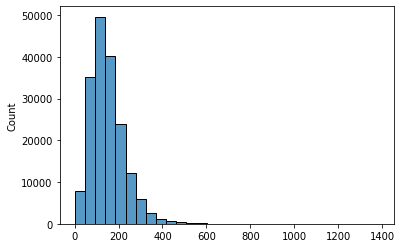

In [86]:
sns.histplot(x=char_sent_len, bins=30)

In [87]:
char_sent_len = int(np.quantile(char_sent_len,0.95))

In [88]:
char_sent_len

290

In [89]:
import string
chars = string.ascii_lowercase + string.digits + string.punctuation

In [90]:
char_vocab = len(chars)

In [91]:
char_vocab

68

In [92]:
char_vectorizer = tf.keras.layers.TextVectorization(max_tokens=char_vocab,
                                                    output_sequence_length=char_sent_len,
                                                    # standardize=None This is used so that all punctuations are used for text vectorization
                                                    )

In [93]:
char_vectorizer.adapt(train_dataset_char)

In [94]:
print(f"Vocabulary of the character level text vectorizer:{len(char_vectorizer.get_vocabulary())}")
print(f"The most common characters in the vectorizer are:{char_vectorizer.get_vocabulary()[:10]}")
print(f"The least common characters in the vectorizer are:{char_vectorizer.get_vocabulary()[-10:]}")

Vocabulary of the character level text vectorizer:28
The most common characters in the vectorizer are:['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']
The least common characters in the vectorizer are:['g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']


In [95]:
rand_sent = random.choice(train_dataset_char)
print(f"The charified sentence is:\n{rand_sent}")
print(f"The length of random sentence is:\n{len(rand_sent.split())}")
char_vectorized = char_vectorizer([rand_sent])
print(f"The vectorized form is:\n{char_vectorized}")
print(f"The length of the vectorized form is:\n{len(char_vectorized[0])}")

The charified sentence is:
I n t e r e s t i n g l y   ,   t h e   u s e   o f   a s p i r i n   i n   s m o k e r s   r e s u l t e d   i n   a n   i n c r e a s e d   r i s k   ,   w i t h   a n   O R   o f   @   .
The length of random sentence is:
76
The vectorized form is:
[[ 4  6  3  2  8  2  9  3  4  6 18 12 19  3 13  2 16  9  2  7 17  5  9 14
   4  8  4  6  4  6  9 15  7 23  2  8  9  8  2  9 16 12  3  2 10  4  6  5
   6  4  6 11  8  2  5  9  2 10  8  4  9 23 20  4  3 13  5  6  7  8  7 17
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

### Char level embedding

In [96]:
char_embedding = tf.keras.layers.Embedding(input_dim=len(char_vectorizer.get_vocabulary()),
                                           output_dim=25,
                                           mask_zero=True)


In [97]:
print(f"Charified sentence: \n {rand_sent}")
print(f"Length of charified sentence: {len(rand_sent.split())}")
rand_char_embed = char_embedding(char_vectorizer([rand_sent]))
print(f"Character embedded sentence: \n {rand_char_embed}")
print(f"Shape of embedding: {rand_char_embed.shape}")

Charified sentence: 
 I n t e r e s t i n g l y   ,   t h e   u s e   o f   a s p i r i n   i n   s m o k e r s   r e s u l t e d   i n   a n   i n c r e a s e d   r i s k   ,   w i t h   a n   O R   o f   @   .
Length of charified sentence: 76
Character embedded sentence: 
 [[[ 0.04522115 -0.00426181  0.0264014  ... -0.03073212 -0.01415402
   -0.01371869]
  [ 0.02752669  0.01607763  0.03093911 ... -0.01572456  0.03910634
    0.04575158]
  [-0.03877151 -0.02305652 -0.00081538 ... -0.02212366 -0.00808262
   -0.0257751 ]
  ...
  [ 0.03981723  0.0009297  -0.03672355 ...  0.00999417  0.02885414
    0.04463245]
  [ 0.03981723  0.0009297  -0.03672355 ...  0.00999417  0.02885414
    0.04463245]
  [ 0.03981723  0.0009297  -0.03672355 ...  0.00999417  0.02885414
    0.04463245]]]
Shape of embedding: (1, 290, 25)


### Conv-1D model with character text vectorization and embedding

In [98]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
vect = char_vectorizer(inputs)
embedding = char_embedding(vect)
x = tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same', activation='relu')(embedding)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs)

In [99]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [100]:
train_dataset_char_p = tf.data.Dataset.from_tensor_slices((train_dataset_char, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset_char_p = tf.data.Dataset.from_tensor_slices((validation_dataset_char, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_char_p = tf.data.Dataset.from_tensor_slices((test_dataset_char, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [101]:
train_dataset_char_p

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [102]:
history_3 = model_3.fit(train_dataset_char_p,
                        steps_per_epoch=int(0.1*len(train_dataset_char_p)),
                        epochs=5,
                        validation_data=valid_dataset_char_p,
                        validation_steps=int(0.1*len(valid_dataset_char_p)),
                        callbacks=[create_tensorboard_callback('training_logs','CONV1D_char_embedding')])

Saving TensorBoard log files to: training_logs/CONV1D_char_embedding/20221113-081122
Epoch 1/5
562/562 [==============================] - 4s 6ms/step - loss: 1.1797 - accuracy: 0.5072 - val_loss: 0.9556 - val_accuracy: 0.6004
Epoch 2/5
562/562 [==============================] - 3s 6ms/step - loss: 0.9140 - accuracy: 0.6327 - val_loss: 0.8365 - val_accuracy: 0.6719
Epoch 3/5
562/562 [==============================] - 4s 7ms/step - loss: 0.8521 - accuracy: 0.6595 - val_loss: 0.7996 - val_accuracy: 0.6838
Epoch 4/5
562/562 [==============================] - 3s 6ms/step - loss: 0.8066 - accuracy: 0.6816 - val_loss: 0.7823 - val_accuracy: 0.6898
Epoch 5/5
562/562 [==============================] - 3s 6ms/step - loss: 0.7829 - accuracy: 0.6955 - val_loss: 0.7769 - val_accuracy: 0.7045


In [103]:
model_3.evaluate(valid_dataset_char_p)

945/945 [==============================] - 4s 4ms/step - loss: 0.7809 - accuracy: 0.7010


[0.7809157967567444, 0.7010128498077393]

In [104]:
model_3_probs = model_3.predict(valid_dataset_char_p)
model_3_preds = tf.argmax(model_3_probs, axis=1)

945/945 [==============================] - 3s 3ms/step


In [105]:
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 1, 1])>

In [106]:
model_3_probs

array([[0.24355258, 0.28040653, 0.03810276, 0.41856006, 0.0193781 ],
       [0.33425152, 0.5942022 , 0.00193627, 0.06407704, 0.00553302],
       [0.24078299, 0.21350157, 0.02061128, 0.5193239 , 0.00578025],
       ...,
       [0.01654867, 0.06074283, 0.05240793, 0.00460147, 0.8656991 ],
       [0.10593658, 0.33165842, 0.33099094, 0.08225287, 0.14916119],
       [0.42418367, 0.52941924, 0.01834832, 0.02453686, 0.00351198]],
      dtype=float32)

In [107]:
model_3_results = calculate_results(val_labels_label_enc,model_2_preds)

In [108]:
model_3_results

{'accuracy': 67.3871309413478,
 'precision': 0.6695872307540849,
 'recall': 0.6738713094134781,
 'f1': 0.657763543585687}

## Model_4: Combine char level and token level embedding and build a bi-directional model

In [109]:
token_model_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string, name='token_model_input')
token_model_embeddings = use_embedding(token_model_inputs)
token_model_outputs = tf.keras.layers.Dense(128, activation='relu', name='char_model_output')(token_model_embeddings)
token_model = tf.keras.Model(token_model_inputs, token_model_outputs)

char_model_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name='char_model_input')
char_model_vect = char_vectorizer(char_model_inputs)
char_model_embedding = char_embedding(char_model_vect)
char_model_bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25), name='char_model_outputs')(char_model_embedding)
char_model = tf.keras.Model(char_model_inputs, char_model_bilstm)

token_char_concat = tf.keras.layers.Concatenate(name='Concatenate')([token_model.output, char_model.output])

comb_model_dropout_1 = tf.keras.layers.Dropout(0.5, name='Dropout_1')(token_char_concat)
comb_model_dense = tf.keras.layers.Dense(200, activation='relu')(comb_model_dropout_1)
comb_model_dropout_2 = tf.keras.layers.Dropout(0.5, name='drop_out_2')(comb_model_dense)
comb_model_outputs = tf.keras.layers.Dense(5, activation='softmax', name='model_3_outputs')(comb_model_dropout_2)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input], outputs=comb_model_outputs)

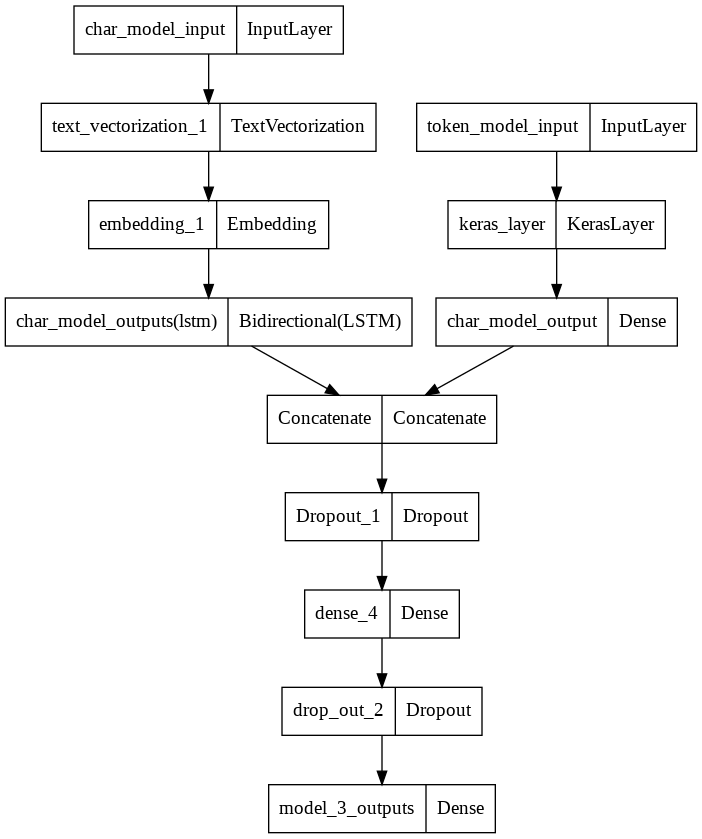

In [110]:
from keras.utils import plot_model
plot_model(model_4)

### Turn the dataset into prefetch dataset

In [111]:
train_char_tokens_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_dataset_char))
train_dataset_one_hot = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_tokens_dataset = tf.data.Dataset.zip((train_char_tokens_dataset, train_dataset_one_hot))
train_char_tokens_dataset = train_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [112]:
validation_char_tokens_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, validation_dataset_char))
validation_dataset_one_hot = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
validation_char_tokens_dataset = tf.data.Dataset.zip((validation_char_tokens_dataset, validation_dataset_one_hot))
validation_char_tokens_dataset = validation_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [113]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [114]:
history_4 = model_4.fit(train_char_tokens_dataset,
                        steps_per_epoch=int(0.1 * len(train_char_tokens_dataset)),
                        epochs=5,
                        validation_data=validation_char_tokens_dataset,
                        validation_steps=int(0.1 * len(validation_char_tokens_dataset)),
                        callbacks=[create_tensorboard_callback('training_logs','Char_Token_Comb_model')])

Saving TensorBoard log files to: training_logs/Char_Token_Comb_model/20221113-081153
Epoch 1/5
562/562 [==============================] - 41s 57ms/step - loss: 0.9715 - accuracy: 0.6065 - val_loss: 0.7739 - val_accuracy: 0.6995
Epoch 2/5
562/562 [==============================] - 28s 50ms/step - loss: 0.7879 - accuracy: 0.6971 - val_loss: 0.7120 - val_accuracy: 0.7304
Epoch 3/5
562/562 [==============================] - 27s 48ms/step - loss: 0.7645 - accuracy: 0.7055 - val_loss: 0.6851 - val_accuracy: 0.7430
Epoch 4/5
562/562 [==============================] - 31s 56ms/step - loss: 0.7326 - accuracy: 0.7219 - val_loss: 0.6681 - val_accuracy: 0.7520
Epoch 5/5
562/562 [==============================] - 27s 49ms/step - loss: 0.7343 - accuracy: 0.7209 - val_loss: 0.6544 - val_accuracy: 0.7473


In [ ]:
model_4.evaluate(validation_char_tokens_dataset)

902/945 [===========================>..] - ETA: 1s - loss: 0.6569 - accuracy: 0.7482

In [ ]:
model_4_probs = model_4.predict(validation_char_tokens_dataset)
model_4_preds = tf.argmax(model_4_probs,axis=1)

In [ ]:
model_4_probs

In [ ]:
model_4_preds

In [ ]:
model_4_results = calculate_results(val_labels_label_enc, model_4_preds)

In [ ]:
model_4_results

In [ ]:
model_0_results

## Model_5: Create a tribid model with token_embedding, char_embedding, line_numbers and total_lines

### One hot encoding line numbers and total lines

In [ ]:
train_df.head()

In [ ]:
train_df['Line Number'].value_counts()

In [ ]:
train_df['Line Number'].plot(kind='hist',bins=30)

In [ ]:
train_line_num_one_hot = tf.one_hot(train_df['Line Number'].to_numpy(), depth=16)
valid_line_num_one_hot = tf.one_hot(validation_df['Line Number'].to_numpy(), depth=16)
test_line_num_one_hot = tf.one_hot(test_df['Line Number'].to_numpy(), depth=16)

In [ ]:
train_line_num_one_hot[:15]

In [ ]:
train_df['Total Lines']

In [ ]:
train_df['Total Lines'].value_counts()

In [ ]:
train_df['Total Lines'].plot(kind='hist')

In [ ]:
np.percentile(train_df['Total Lines'], 95)

In [ ]:
train_df_total_lines_one_hot = tf.one_hot(train_df['Total Lines'].to_numpy(), depth=20)
val_df_total_lines_one_hot = tf.one_hot(validation_df['Total Lines'].to_numpy(), depth=20)
test_df_total_lines_one_hot = tf.one_hot(test_df['Total Lines'].to_numpy(), depth=20)

In [ ]:
train_df_total_lines_one_hot[:14]

### Building model_5

In [ ]:
token_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
token_embedding = use_embedding(token_inputs)
output = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, output)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
char_tokenizer = char_vectorizer(char_inputs)
char_embedded = char_embedding(char_tokenizer)
output = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25))(char_embedded)
char_model = tf.keras.Model(char_inputs, output)

line_num_inputs = tf.keras.layers.Input(shape=(16))
line_num_outputs = tf.keras.layers.Dense(32, activation='relu')(line_num_inputs)
line_num_model = tf.keras.Model(line_num_inputs, line_num_outputs)

total_line_inputs = tf.keras.layers.Input(shape=(20))
total_line_outputs = tf.keras.layers.Dense(32, activation='relu')(total_line_inputs)
total_line_model = tf.keras.Model(total_line_inputs, total_line_outputs)

concat_embedding = tf.keras.layers.Concatenate()([token_model.output, char_model.output])

concat_dropout = tf.keras.layers.Dropout(0.5)(concat_embedding)

tribid_embedding = tf.keras.layers.Concatenate()([concat_dropout, line_num_model.output, total_line_model.output])

tribrid_outputs = tf.keras.layers.Dense(5, activation='softmax')(tribid_embedding)

model_5 = tf.keras.Model(inputs=[token_model.input, 
                                 char_model.input,
                                 line_num_model.input,
                                 total_line_model.inputs], outputs=tribrid_outputs)

In [ ]:
model_5.summary()

In [ ]:
from keras.utils import plot_model
plot_model(model_5)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # Reduces overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
train_char_pos_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, 
                                             train_dataset_char,
                                             train_line_num_one_hot,
                                             train_df_total_lines_one_hot))
train_char_pos_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_tribrid_data = tf.data.Dataset.zip((train_char_pos_token_data, train_char_pos_token_labels))
train_tribrid_data = train_tribrid_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
validation_char_pos_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, 
                                             validation_dataset_char,
                                             valid_line_num_one_hot,
                                             val_df_total_lines_one_hot))
validation_char_pos_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
validation_tribrid_data = tf.data.Dataset.zip((validation_char_pos_token_data, validation_char_pos_token_labels))
validation_tribrid_data = validation_tribrid_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
history_5 = model_5.fit(train_tribrid_data,
                        epochs=3,
                        steps_per_epoch=int(0.1 * len(train_tribrid_data)),
                        validation_data=validation_tribrid_data,
                        validation_steps=int(0.1 * len(validation_tribrid_data)),
                        callbacks=[create_tensorboard_callback('training_logs', 'tribrid_model')])

In [ ]:
model_5.evaluate(validation_tribrid_data)

In [ ]:
model_5_probs = model_5.predict(validation_tribrid_data)

In [ ]:
model_5_preds = tf.argmax(model_5_probs, axis=1)

In [ ]:
model_5_results = calculate_results(val_labels_label_enc, model_5_preds)

In [ ]:
model_5_results

In [ ]:
model_4_results

# Comparing the results of all the models

In [ ]:
all_model_results = pd.DataFrame({'model_0_naive_bayes_':model_0_results,
                                  'model_1_custom_token_embedding':model_1_results,
                                  'model_2_use_embedding':model_2_results,
                                  'model_3_char_embedding':model_3_results,
                                  'model_4_char_token_embedding':model_4_results,
                                  'model_5_tribrid_model':model_5_results})

In [ ]:
all_model_results = all_model_results.transpose()

In [ ]:
all_model_results


In [ ]:
all_model_results['accuracy'] = all_model_results['accuracy']/100

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
all_model_results.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
all_model_results.sort_values('f1')['f1'].plot(kind='bar', figsize=(10,7))

In [ ]:
model_5.save('tribrid_model')

In [ ]:
loaded_model = tf.keras.models.load_model('tribrid_model')

In [ ]:
loaded_model_probs = loaded_model.predict(validation_tribrid_data)
loaded_model_preds = tf.argmax(loaded_model_probs, axis=1)
loaded_model_preds[:10]

In [ ]:
loaded_model_results = calculate_results(val_labels_label_enc, loaded_model_preds)

In [ ]:
loaded_model_results

In [ ]:
model_5_results

# Challenge 1

In [ ]:
test_char_pos_token_data = tf.data.Dataset.from_tensor_slices((test_sentences,
                                                               test_dataset_char,
                                                               test_line_num_one_hot,
                                                               test_df_total_lines_one_hot))
test_char_pos_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_tribrid_data = tf.data.Dataset.zip((test_char_pos_token_data, test_char_pos_token_labels))
test_tribrid_data = test_tribrid_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_5.evaluate(test_tribrid_data)

In [ ]:
model_5_probs = model_5.predict(test_tribrid_data)
model_5_preds = tf.argmax(model_5_probs, axis=1)

In [ ]:
model_5_test_results = calculate_results(test_labels_label_enc, model_5_preds)

In [ ]:
model_5_preds

In [ ]:
model_5_test_results

# Challenge 2

In [ ]:
model_5_preds.shape

In [ ]:
tf.reduce_max(model_5_probs, axis=1)

In [ ]:
tf.squeeze(model_5_probs).shape

In [ ]:
model_5_preds_df = pd.DataFrame({'text':test_sentences,
                              'true_labels':test_labels_label_enc,
                              'predicted_labels':tf.squeeze(model_5_preds),
                              'predicted_class':class_names[np.array(tf.squeeze(model_5_preds))],
                              'predicted_probs':tf.squeeze(tf.reduce_max(model_5_probs, axis=1))})

In [ ]:
model_5_preds_df.head()

In [ ]:
wrong_preds = model_5_preds_df[model_5_preds_df['true_labels']!=model_5_preds_df['predicted_labels']]

In [ ]:
most_wrong_preds = wrong_preds.sort_values(by='predicted_probs', ascending=False)

In [ ]:
most_wrong_preds.head()

In [ ]:
class_names

In [ ]:
for rows in most_wrong_preds[:10].itertuples():
  _, text, true_labels, predicted_labels, true_class, predicted_probs = rows
  print(f"Text:\n{text}\n")
  print(f"True label:{true_labels}\n")
  print(f"True Class:{true_class}\n")
  print(f"Predicted Label:{predicted_labels}\n")
  print(f"Predicted Probability:\n{predicted_probs}\n\n")

# Challenge 3

In [ ]:
train_char_pos_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, 
                                             train_dataset_char,
                                             train_line_num_one_hot,
                                             train_df_total_lines_one_hot))

In [ ]:
text = 'Although the incidence of oral cavity cancer is high among low and middle income countries in Asia where the risk habits (tobacco smoking, tobacco chewing and betel quid use) are common, the benefits for introducing oral cancer screening for the whole population in these countries still remains controversial. It is disappointing, but not surprising that many of studies, without control arms, could not provide a clear answer as to whether screening is effective in reducing mortality or combating rising incidence trends. Only one Indian study that reported a randomized controlled trial (RCT) elucidated that mass screening for high risk groups could significantly reduce the cancer mortality or down-stage cancers detected by screening. Several professional organizations that considered any potential benefits of oral cancer screening remain unconvinced that the current knowledge on its natural history, available tests and interventions to treat potentially malignant disorders satisfy the desirable criteria to recommend organized screening for oral cancer. In this review we discuss advantages and disadvantages for oral cancer screening particularly with reference to high incidence countries in Asia. If screening is undertaken, we propose that it is targeted to high risk groups and to combine screening with education on risky life-styles so that overall incidence can be reduced in the future. Further research on increasing public awarenes and impact of professional education such as e-learning to reduce diagnostic delays, studies on the natural history of oral potentially malignant disorders and cancer, comprehensive tobacco and areca nut cessation programs, developing tools to identify high-risk individuals and high-risk lesions are proposed.'

In [ ]:
sent = [" ".join(str.split(text))]

In [ ]:
sente = str.split(sent[0], '.') 

In [ ]:
sente

In [ ]:
sentee = sente[0]

In [ ]:
char_sente = list(sentee)

In [ ]:
char_sente = " ".join(char_sente)

In [ ]:
def split_string(text):
  return " ".join(list(text))

In [ ]:
total_lines_one_hot = tf.one_hot(8, depth=20)

In [ ]:
char_sente

In [ ]:
# tf.data.Dataset.from_tensor_slices(tf.expand_dims(char_sente, axis=1))

In [ ]:
# tf.data.Dataset.from_tensor_slices((total_lines_one_hot, char_sente))

In [ ]:
# def preprocess_abstract(abstract):
#   abstract_dict = {}
#   sentence_list = str.split(abstract)
#   sentences = [" ".join(sentence_list)]
#   sentence = str.split(sentences[0], '.')
#   total_lines = len(sentence)
#   total_lines_one_hot = tf.one_hot(total_lines, depth=20)
#   for i in range(total_lines):
#     current_line_one_hot = tf.one_hot((i+1), depth=16)
#     current_sentence = [sentence[i]]
#     char_sentence = " ".join(list(current_sentence))
#     print(current_sentence)
#     print(char_sentence)
#     print(current_line_one_hot)
#     print(total_lines_one_hot)
#     test_line = tf.data.Dataset.from_tensor_slices((current_sentence,
#                                                    char_sentence,
#                                                     current_line_one_hot,
#                                                     total_lines_one_hot,))
#     model_5_probs_current = model_5.predict(test_line)
#     model_5_current_preds = tf.argmax(model_5_probs_current, axis=1)
#     model_5_current_label = class_names[int(tf.squeeze(model_5_current_preds))]
#     abstract_dict[current_sentence] = model_5_current_label
#   return abstract_dict


In [ ]:
# abs_res = preprocess_abstract(abstract=text)

In [ ]:
def predict_abstracts(abstract):
  sentence_list = str.split(abstract)
  sentences = [" ".join(sentence_list)]
  sentence = str.split(sentences[0], '.')
  total_lines = []
  for i in range(len(sentence)):
    total_lines.append(8)
  total_lines_one_hot = tf.one_hot(total_lines, depth=20)
  char_sentence = [" ".join(list(ch)) for ch in sentence]
  lines = [i + 1 for i in range(len(sentence))]
  lines_one_hot = tf.one_hot(lines, depth=16)
  # print(tf.constant(char_sentence))
  # test_line = tf.data.Dataset.from_tensor_slices((current_sentence,
  #                                                  char_sentence,
  #                                                   current_line_one_hot,
  #                                                   tf.expand_dims(total_lines_one_hot, axis=-1)))
  model_5_probs_test = model_5.predict(x=(tf.constant(sentence),
                                          tf.constant(char_sentence),
                                          lines_one_hot,
                                          total_lines_one_hot))
  model_5_test_preds = tf.argmax(model_5_probs_test, axis=1)
  model_5_test_label = class_names[model_5_test_preds.numpy()]
  for i in range(len(sentence)):
    print(f"{model_5_test_label[i]} : {sentence[i]}")

In [ ]:
text = 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.'

In [ ]:
text = "Hepatitis C virus (HCV) and alcoholic liver disease (ALD), either alone or in combination, count for more than two thirds of all liver diseases in the Western world. There is no safe level of drinking in HCV-infected patients and the most effective goal for these patients is total abstinence. Baclofen, a GABA(B) receptor agonist, represents a promising pharmacotherapy for alcohol dependence (AD). Previously, we performed a randomized clinical trial (RCT), which demonstrated the safety and efficacy of baclofen in patients affected by AD and cirrhosis. The goal of this post-hoc analysis was to explore baclofen's effect in a subgroup of alcohol-dependent HCV-infected cirrhotic patients. Any patient with HCV infection was selected for this analysis. Among the 84 subjects randomized in the main trial, 24 alcohol-dependent cirrhotic patients had a HCV infection; 12 received baclofen 10mg t.i.d. and 12 received placebo for 12-weeks. With respect to the placebo group (3/12, 25.0%), a significantly higher number of patients who achieved and maintained total alcohol abstinence was found in the baclofen group (10/12, 83.3%; p=0.0123). Furthermore, in the baclofen group, compared to placebo, there was a significantly higher increase in albumin values from baseline (p=0.0132) and a trend toward a significant reduction in INR levels from baseline (p=0.0716). In conclusion, baclofen was safe and significantly more effective than placebo in promoting alcohol abstinence, and improving some Liver Function Tests (LFTs) (i.e. albumin, INR) in alcohol-dependent HCV-infected cirrhotic patients. Baclofen may represent a clinically relevant alcohol pharmacotherapy for these patients."

In [ ]:
text = "Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant proportion of global disability and poses a substantial social, economic and heath burden. Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders. There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness. This review provides an overview of the nutritional psychiatry field. It includes a discussion of the neurobiological mechanisms likely modulated by diet, the use of dietary and nutraceutical interventions in mental disorders, and recommendations for further research. Potential biological pathways related to mental disorders include inflammation, oxidative stress, the gut microbiome, epigenetic modifications and neuroplasticity. Consistent epidemiological evidence, particularly for depression, suggests an association between measures of diet quality and mental health, across multiple populations and age groups; these do not appear to be explained by other demographic, lifestyle factors or reverse causality. Our recently published intervention trial provides preliminary clinical evidence that dietary interventions in clinically diagnosed populations are feasible and can provide significant clinical benefit. Furthermore, nutraceuticals including n-3 fatty acids, folate, S-adenosylmethionine, N-acetyl cysteine and probiotics, among others, are promising avenues for future research. Continued research is now required to investigate the efficacy of intervention studies in large cohorts and within clinically relevant populations, particularly in patients with schizophrenia, bipolar and anxiety disorders."

In [ ]:
predict_abstracts(text)

In [ ]:
from spacy.lang.en import English

In [ ]:
import json

In [ ]:
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

In [ ]:
nlp = English() # setup English sentence parser
sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
nlp.add_pipe('sentencizer') # add sentence splitting pipeline object to sentence parser
doc = nlp(example_abstracts[0]["abstract"]) # create "doc" of parsed sequences, change index for a different abstract
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

In [ ]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

In [ ]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=16) 
test_abstract_line_numbers_one_hot

In [ ]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

In [ ]:

# Split abstract lines into characters
abstract_chars = [split_string(sentence) for sentence in abstract_lines]
abstract_chars

In [ ]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_model.predict(x=(

                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars),
                                                   test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot))
test_abstract_pred_probs

In [ ]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

In [ ]:

# Turn prediction class integers into string class names
test_abstract_pred_classes = [labelencoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

In [ ]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

# Exercises